In [10]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
def plot_digit(digit):
    digit_image = digit.reshape(28, 28)
    plt.imshow(digit_image, cmap = mpl.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()

def plot_digits(digits):
    
    fig=plt.figure(figsize=(8, 8))
    for i, digit in enumerate(digits):
        digit_image = digit.reshape(28, 28)
        fig.add_subplot(5, len(digits) // 5 + 1, i + 1)
        plt.imshow(digit_image, cmap = mpl.cm.binary, interpolation="nearest")
    plt.show()

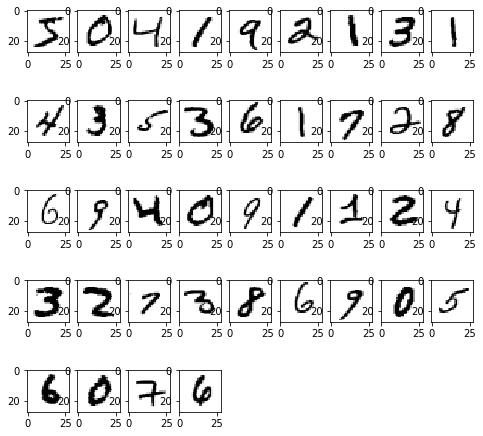

In [12]:
plot_digits(X[:40])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

In [30]:

import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier

svm_clf = Pipeline([
("scaler", StandardScaler()),
("linear_sc", SGDClassifier(alpha=0.001)),
])




In [31]:
svm_clf.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_sc', SGDClassifier(alpha=0.001))])

In [20]:
# USING the GridSearcch I learned that alpha = 0.001 Dont run this
from sklearn.model_selection import GridSearchCV
print(svm_clf.get_params())
parameters = {"linear_sc__alpha":(0.01, 0.001,0.0001,0.00001, 0.000001)}

grid_search = GridSearchCV(svm_clf, parameters, verbose=1)
grid_search.fit(X_train[:5000], y_train[:5000])

{'memory': None, 'steps': [('scaler', StandardScaler()), ('linear_sc', SGDClassifier())], 'verbose': False, 'scaler': StandardScaler(), 'linear_sc': SGDClassifier(), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'linear_sc__alpha': 0.0001, 'linear_sc__average': False, 'linear_sc__class_weight': None, 'linear_sc__early_stopping': False, 'linear_sc__epsilon': 0.1, 'linear_sc__eta0': 0.0, 'linear_sc__fit_intercept': True, 'linear_sc__l1_ratio': 0.15, 'linear_sc__learning_rate': 'optimal', 'linear_sc__loss': 'hinge', 'linear_sc__max_iter': 1000, 'linear_sc__n_iter_no_change': 5, 'linear_sc__n_jobs': None, 'linear_sc__penalty': 'l2', 'linear_sc__power_t': 0.5, 'linear_sc__random_state': None, 'linear_sc__shuffle': True, 'linear_sc__tol': 0.001, 'linear_sc__validation_fraction': 0.1, 'linear_sc__verbose': 0, 'linear_sc__warm_start': False}
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 conc

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('linear_sc', SGDClassifier())]),
             param_grid={'linear_sc__alpha': (0.01, 0.001, 0.0001, 1e-05,
                                              1e-06)},
             verbose=1)

In [29]:
print(grid_search.best_estimator_)
print(grid_search.best_params_)
grid_search.best_score_
print(grid_search.)


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_sc', SGDClassifier(alpha=0.001))])
{'linear_sc__alpha': 0.001}


AttributeError: probability estimates are not available for loss='hinge'

In [32]:
y_predict = svm_clf.predict(X_test)
y_test_predict = y_predict
y_training = svm_clf.predict(X_train)
y_training_predict = y_training

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import learning_curve


def model_validation():
    train_sizes, train_scores, valid_scores = learning_curve( 
        SGDClassifier(), X, y, train_sizes=[10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 15000, 20000, 40000], cv=5)
    return train_sizes, train_scores, valid_scores


def evaluate_model(y_test, y_predict):
    print(confusion_matrix(y_test, y_predict))
    print(f1_score(y_test, y_predict, average="micro"))
    print(accuracy_score(y_test, y_predict))

def test_vs_training(y_test, y_test_predict, y_training, y_training_predict):
    test_acc = accuracy_score(y_test, y_test_predict)
    training_acc = accuracy_score(y_training, y_training_predict)  
    diff =  test_acc - training_acc
    print(f"test {test_acc}")     
    print(f"training  {training_acc}") 
    print(f"DIFF  {test_acc - training_acc}") 
    

def show_group(id, X_test, y_predict, n=40):
    x_in_group = []
    for x, y in zip(X_test, y_predict):

        if str(id) == y:
            x_in_group.append(x)
        if len(x_in_group) == n:
            break
    plot_digits(x_in_group)



In [34]:
evaluate_model(y_test, y_predict)
evaluate_model(y_training, y_training_predict)
test_vs_training(y_test, y_test_predict, y_training, y_training_predict)

# show_group(8, X_test, y_predict)

[[4588    1   12   13   12   54   31    7   43    2]
 [   1 5300   31   27    3   43    4    8  102    9]
 [  39   28 4329   94   81   26   80   47  163   13]
 [  27   32  100 4320    2  199   27   63  138   67]
 [   7   16   33    3 4369    8   39   22   90  185]
 [  52   33   26  205   66 3720   77   23  171   89]
 [  32   33   37    0   52  107 4423    4   63    0]
 [  24   20   75   22   49    8    1 4732   20  199]
 [  41  106   57  121   10  145   33   19 4171  125]
 [  34   25   27   63  134   27    2  147   80 4332]]
0.9037551020408163
0.9037551020408163
[[2155    0    0    0    0    0    0    0    0    0]
 [   0 2386    0    0    0    0    0    0    0    0]
 [   0    0 2028    0    0    0    0    0    0    0]
 [   0    0    0 2069    0    0    0    0    0    0]
 [   0    0    0    0 2044    0    0    0    0    0]
 [   0    0    0    0    0 1813    0    0    0    0]
 [   0    0    0    0    0    0 2129    0    0    0]
 [   0    0    0    0    0    0    0 2089    0    0]
 [   0 

In [35]:
train_size, train_score, valid_score= model_validation()


KeyboardInterrupt: 

In [60]:
train_size, train_score, valid_score 


(array([  10,   20,   50,  100,  200,  500, 1000, 2000, 5000]),
 array([[1.    , 1.    , 1.    , 1.    , 1.    ],
        [1.    , 1.    , 1.    , 1.    , 1.    ],
        [1.    , 1.    , 1.    , 1.    , 1.    ],
        [1.    , 1.    , 1.    , 1.    , 1.    ],
        [1.    , 1.    , 1.    , 1.    , 1.    ],
        [0.998 , 1.    , 1.    , 1.    , 1.    ],
        [0.997 , 1.    , 0.999 , 0.998 , 0.999 ],
        [0.9865, 0.986 , 0.987 , 0.9845, 0.98  ],
        [0.9566, 0.9614, 0.9628, 0.957 , 0.9422]]),
 array([[0.17878571, 0.36321429, 0.33307143, 0.32035714, 0.30592857],
        [0.24607143, 0.4065    , 0.50714286, 0.45892857, 0.52335714],
        [0.35964286, 0.542     , 0.58385714, 0.57685714, 0.54457143],
        [0.41542857, 0.64507143, 0.64735714, 0.63828571, 0.6485    ],
        [0.54964286, 0.71542857, 0.71528571, 0.71728571, 0.73207143],
        [0.73421429, 0.808     , 0.79478571, 0.79192857, 0.82878571],
        [0.80721429, 0.82385714, 0.82464286, 0.81821429, 0.84185